# **AP3 ML - Decision Tree**
* Dataset: WineQT.csv

A Decision Tree is a machine learning algorithm used for both classification and regression tasks. It works by breaking down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes as we will see in the final of this project.
In this project, the decision tree is being used to classify 6 instances or "how good the wine is in terms of quality" of the WineQT dataset.


In [125]:
#Importa a biblioteca pandas
import pandas as pd

In [126]:
#Load WineQT dataset
data = pd.read_csv("WineQT.csv")

In [127]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [129]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

### Pré-processing data
* Conversion of class attribute to binary form using LabelEncoder.
* LabelEncoder:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
* Remoção do atributo Id

In [130]:
#  Código Aqui
from sklearn.preprocessing import LabelEncoder

In [131]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

In [132]:
data['quality'].unique()

array([2, 3, 4, 1, 5, 0])

In [133]:
# Remove Id column beacuse it's irrelevant for our analysis.
# Código Aqui
data.drop(['Id'], axis=1, inplace=True)

In [134]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Data Splitting: training and test sets
* y - Obtem os valores da classe.
* X - Obtem os dados de treinamento (previsores).

    Data Splitting:
    The dataset is divided into training and test sets. This involves separating the target variable ('y') from the predictors ('X').

In [135]:
# Biblioteca para separação treino e teste
from sklearn.model_selection import train_test_split

In [136]:
# Faz a separação entre classe e previsores (X e y)
# Código Aqui
X = data.drop(['quality'], axis=1).values

In [137]:
# armazena os dados da classe y
y = data['quality'].values

In [138]:
# Faz a separação treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state=1000)

**Note**: I empirically adjusted the parameters in order to improve the model accuracy.

### Decision Tree Implementation: 
- A Decision Tree classifier is imported and set up.
- The model is trained on the training data. 

In [139]:
# Importa a classe de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [140]:
# Gera o objeto árvore de decisão
# Treina o modelo
# Código Aqui
clf = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [141]:
# The model's predictions are stored
# Código Aqui
y_pred = clf.predict(X_test)

In [142]:
# Importa a classe de métricas
from sklearn import metrics

In [143]:
metrics.accuracy_score(y_test, y_pred)

0.75

## Conclusion

- **Accuracy** is a measure used to evaluate the **performance** of a classification model. It is defined as the ratio of correctly predicted observations to the total observations.
- It means that our model can evaluate how good a wine in the dataset is with 75% of precision.
- In this example we followed [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) documentation, where:
    
    - ``criterion`` sets the function to measure the quality of a split. ``entropy`` for the information gain,``gini`` for Gini impurity.
    - ``splitter`` used to choose the split at each node.
    - ``random_state`` Controls the randomness of the estimator. The features are always randomly permuted at each split.

### Visual representation of the trained decision tree.
- We will be using the ``plot_tree`` function from the tree module of scikit-learn to visualize the decision tree of our model. 

In [144]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5234927120141343, 0.9722222222222222, 'alcohol <= 10.525\nentropy = 1.699\nsamples = 1131\nvalue = [6, 33, 476, 460, 141, 15]\nclass = citric acid'),
 Text(0.29328621908127206, 0.9166666666666666, 'sulphates <= 0.625\nentropy = 1.39\nsamples = 691\nvalue = [5, 21, 403, 234, 26, 2]\nclass = citric acid'),
 Text(0.17709253533568906, 0.8611111111111112, 'total sulfur dioxide <= 98.5\nentropy = 1.148\nsamples = 420\nvalue = [3, 15, 290, 109, 3, 0]\nclass = citric acid'),
 Text(0.10330167844522968, 0.8055555555555556, 'sulphates <= 0.525\nentropy = 1.225\nsamples = 366\nvalue = [3, 15, 238, 107, 3, 0]\nclass = citric acid'),
 Text(0.03931095406360424, 0.75, 'citric acid <= 0.055\nentropy = 0.998\nsamples = 114\nvalue = [1, 7, 91, 14, 1, 0]\nclass = citric acid'),
 Text(0.014134275618374558, 0.6944444444444444, 'volatile acidity <= 0.873\nentropy = 1.03\nsamples = 31\nvalue = [1, 5, 24, 0, 1, 0]\nclass = citric acid'),
 Text(0.007067137809187279, 0.6388888888888888, 'residual sugar <

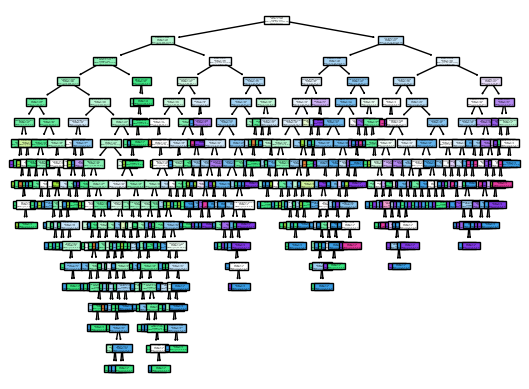

In [145]:
# Gráfico da árvore de decisão gerada
tree.plot_tree(clf, feature_names=data.columns.drop('quality').tolist(), 
               class_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
               filled=True)

## Conclusion
- This visualization helps to understand how the decision tree makes splits based on feature values and how it arrives at its predictions for different classes.
- In this example we followed [sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) documentation, where:
    
    - ``clf`` is my trained decision tree classifier.
    - ``feature_names`` This argument takes a list of names corresponding to the features used in the decision tree. 
    - ``class_names`` a list of columns.
    - ``filled`` When set to True, it colors the nodes to indicate the majority class at each node, with the color intensity indicating the proportion of samples in that class.